# Flight Price Prediction 

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

### Features

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature with 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature created by grouping time periods into bins. It stores information about the departure time and has 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable; stores information of the ticket price.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read in dataset

In [2]:
flights = pd.read_csv('./Clean_Dataset.csv')

In [3]:
flights

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Questions/Thoughts: 

1) All datatypes look correct and column names make sense. 

2) Dataset description says there are 300261 datapoints, but we have 300153. Look for nulls.

3) Double check unique values of categorical feature.

4) What is 'Unnamed: 0'? Looks like a copy of the index. Needs to be dropped.

5) Are there any duplicates?

6) What currency is 'price' given in? Indian Rupee? Add column with price converted to USD. Then drop other price?

7) Look at summary statistics for numeric features. Do they make sense?

8) Look at distributions for each column. 

In [5]:
flights.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Question

No null values. Why do we have 300153 instead of 300261?

### Look at Unique Values

In [6]:
flights['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
flights['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [8]:
flights['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [9]:
flights['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [10]:
flights['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [11]:
flights['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [12]:
flights['class'].unique()

array(['Economy', 'Business'], dtype=object)

### Note:

All categorical features appear to be as described. 

### Drop 'Unnamed: 0' 

Dropping the column 'Unnamed: 0'

In [13]:
flights.drop(columns = 'Unnamed: 0', inplace = True)

In [14]:
flights

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Check for Duplicates

In [15]:
flights[flights.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


### Add new price column:

Making new column with 'price' given in US dollars. New column name 'price_usd'. 

In [16]:
flights['price_usd'] = round(flights['price'] * 0.0122284, 2)

In [17]:
flights

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_usd
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,72.80
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,72.80
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,72.83
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,72.82
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,72.82
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,847.00
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,942.87
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,967.25
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,997.65


### Question:

Should I drop the old price column? Not sure... will keep for now. 

### Summary Statistics for numeric features:

In [18]:
flights.describe()

,duration,days_left,price,price_usd
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523,255.447194
std,7.191997,13.561004,22697.767366,277.557276
min,0.830000,1.000000,1105.000000,13.510000
25%,6.830000,15.000000,4783.000000,58.490000
50%,11.250000,26.000000,7425.000000,90.800000
75%,16.170000,38.000000,42521.000000,519.960000
max,49.830000,49.000000,123071.000000,1504.960000


In [19]:
flights[flights['duration'] == 49.83]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_usd
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891,292.15
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538,214.46


### Question: 

Do these duration values make sense? Almost 50 hours... Maybe with two_or_more stops, but what about with one stop? Really long layover or error?

## Distributions

### Numeric Features

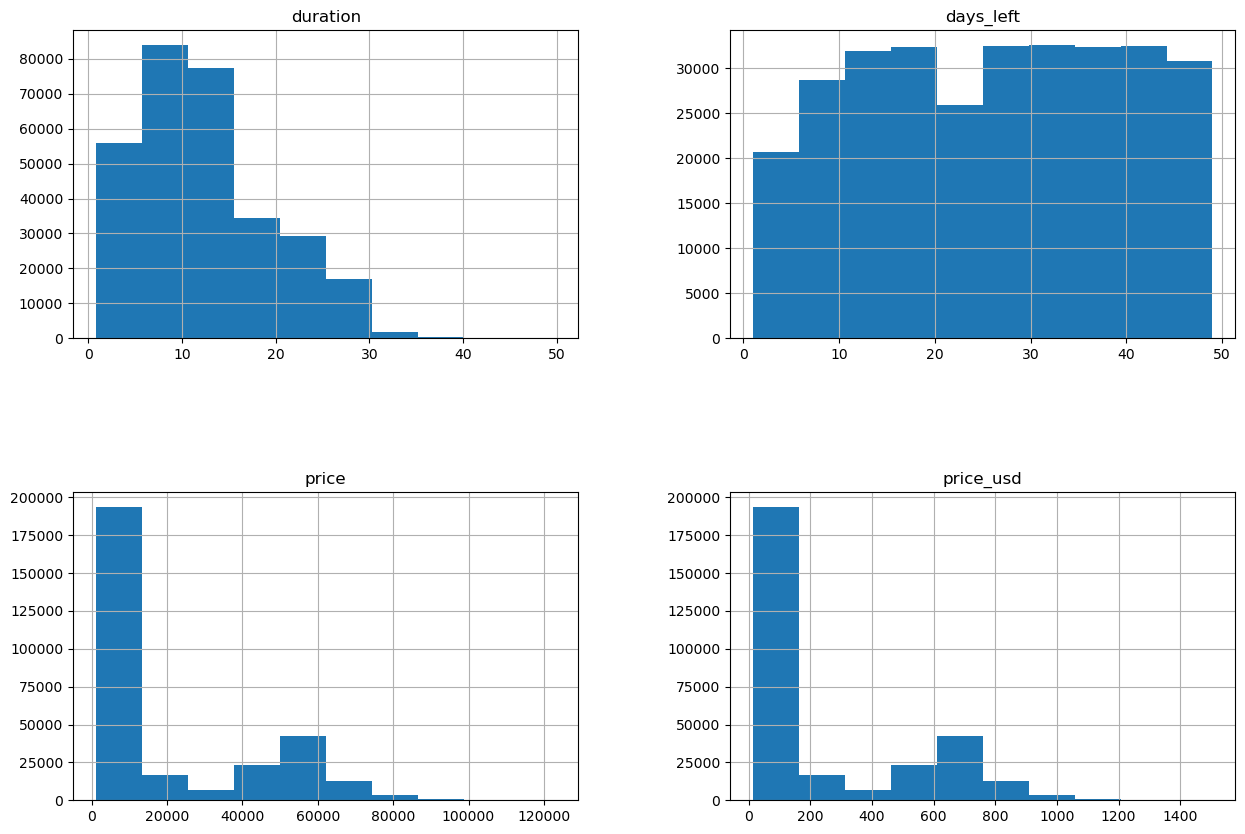

In [20]:
flights.hist(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.5);

### Categorical Features

#### Airline

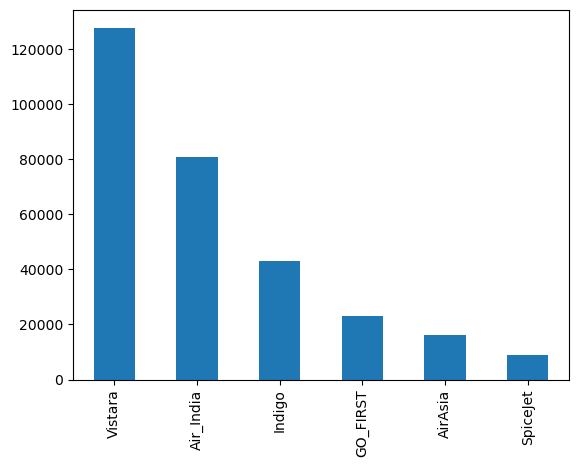

In [21]:
flights['airline'].value_counts().plot(kind = 'bar');

#### Source City

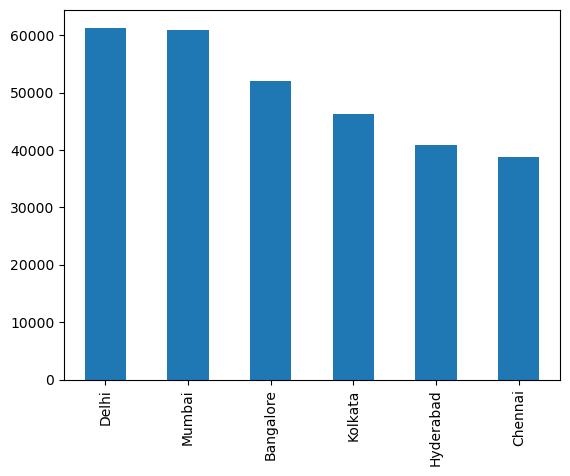

In [22]:
flights['source_city'].value_counts().plot(kind = 'bar');

#### Departure Time

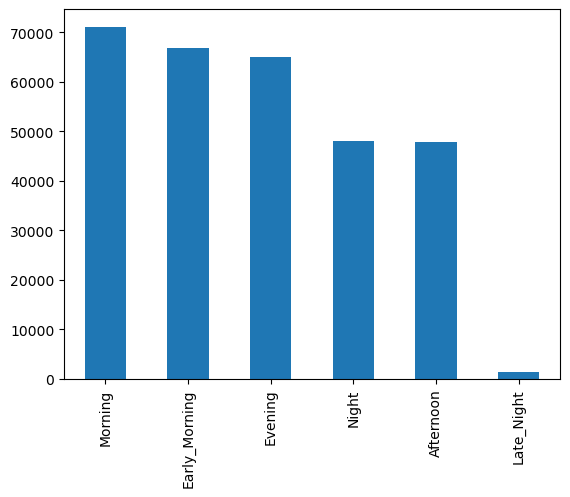

In [23]:
flights['departure_time'].value_counts().plot(kind = 'bar');

#### Stops

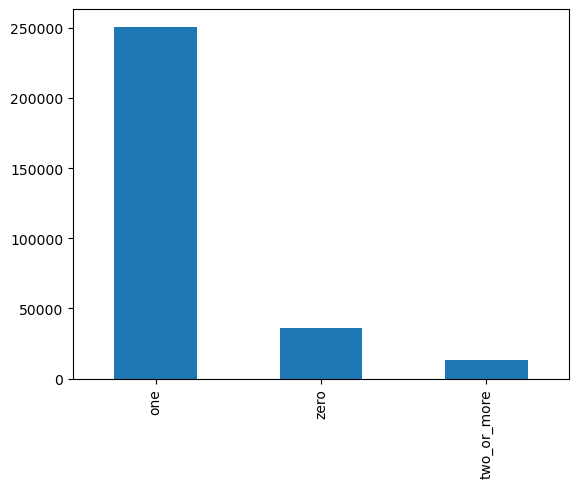

In [24]:
flights['stops'].value_counts().plot(kind = 'bar');

#### Arrival Time

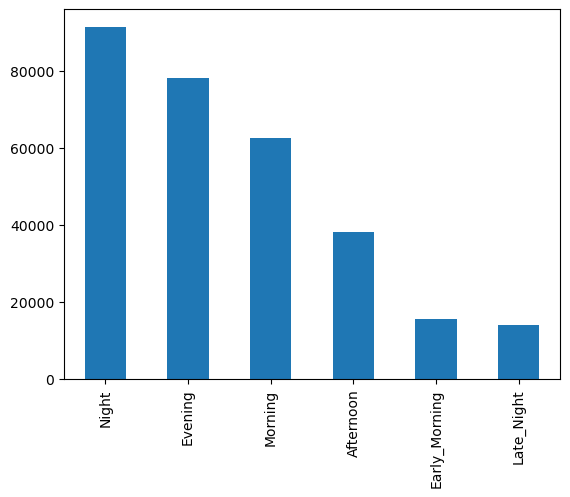

In [25]:
flights['arrival_time'].value_counts().plot(kind = 'bar');

#### Destination City

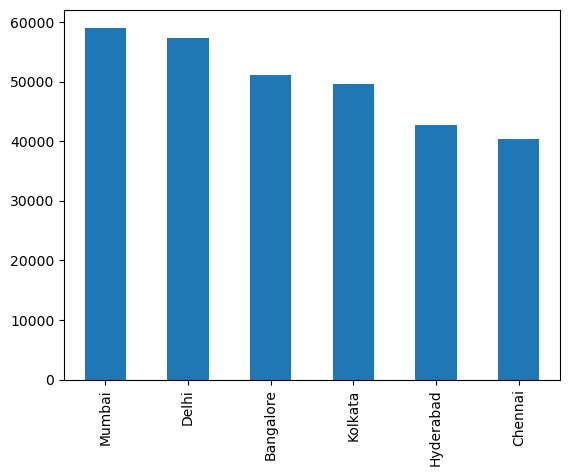

In [26]:
flights['destination_city'].value_counts().plot(kind = 'bar');

#### Class

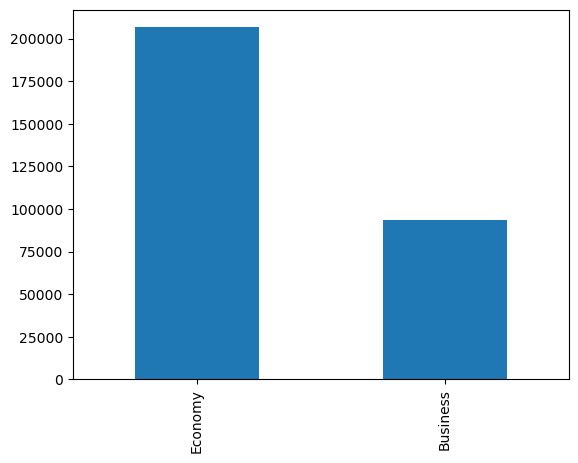

In [27]:
flights['class'].value_counts().plot(kind = 'bar');